In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
iris = datasets.load_iris()
data= iris.data[:, :2] #data
label= iris.target #label


In [ ]:
from sklearn.svm import SVC # Supprt Vector Classifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
X_new=np.hstack((data,np.ones((len(data),1))))

In [ ]:
df=pd.DataFrame(data=np.hstack((X_new,label.reshape(len(data),1))),columns=['Sepal Length','Sepal Width','bias','label'])
df['label']=df['label'].apply(lambda x : int(x))
df

,Sepal Length,Sepal Width,bias,label
0,5.1,3.5,1.0,0
1,4.9,3.0,1.0,0
2,4.7,3.2,1.0,0
3,4.6,3.1,1.0,0
4,5.0,3.6,1.0,0
...,...,...,...,...
145,6.7,3.0,1.0,2
146,6.3,2.5,1.0,2
147,6.5,3.0,1.0,2
148,6.2,3.4,1.0,2


In [ ]:
X=df.drop('label',axis=1)
Y=df['label']

In [ ]:
model = SVC(kernel='linear', C=1000)
model.fit(X, Y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.coef_

array([[-6.31777572e+00,  5.26481134e+00,  7.10542736e-15],
       [-8.56758652e+00,  7.14059760e+00,  7.10542736e-15],
       [-1.60655373e+00, -7.96047821e-01,  0.00000000e+00]])

In [ ]:
model.predict(X_new)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
accuracy_score(label,model.predict(X_new))

0.82

In [ ]:
print(classification_report(label,model.predict(X_new)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.72      0.76      0.74        50
           2       0.74      0.70      0.72        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



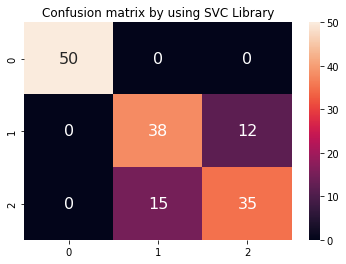

In [ ]:
cm = confusion_matrix(label,model.predict(X_new))
df_cm = pd.DataFrame(cm, index =range(3) ,columns=range(3))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
plt.title("Confusion matrix by using SVC Library");

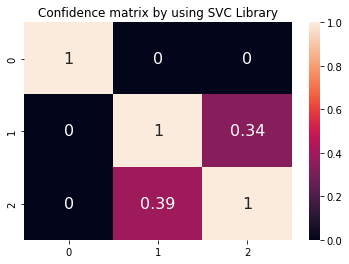

In [ ]:
cm = confusion_matrix(label,model.predict(X_new))
cm=cm / cm.max(axis=0)
df_cm = pd.DataFrame(cm, index =range(3) ,columns=range(3))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
plt.title("Confidence matrix by using SVC Library");

Source form : https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

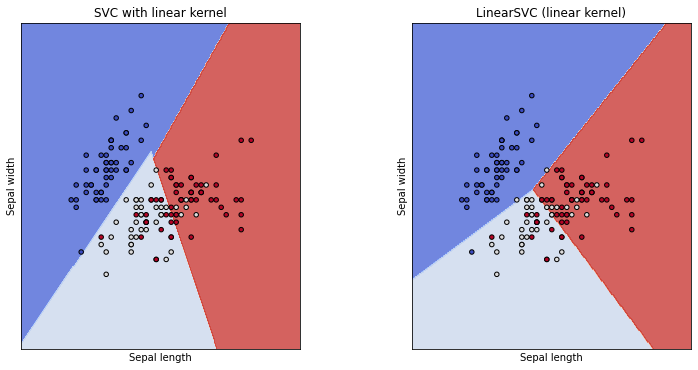

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
)
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2,figsize=(12,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()